# **Indirect Time of Flight**

<img src="" width="1000" align="middle"/>

In [ ]:
!pip install gdown

In [ ]:
!gdown --id '1Bv0Q5QzdX4TEry9c-oCCB-lHsIE1W6eu'

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Bv0Q5QzdX4TEry9c-oCCB-lHsIE1W6eu
To: /content/rami.png
100% 3.76M/3.76M [00:00<00:00, 199MB/s]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


from scipy.io import loadmat


freq = 15 * 1e6 # in MHz

c = 3e8 # in m/s
wavelength = c / freq # in m
max_depth = wavelength / 2

A = 0.5

1.2566370614359172 41178.111547662855


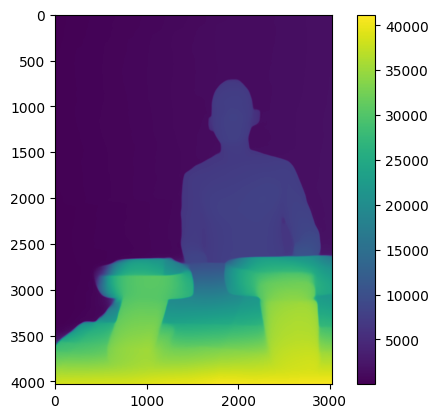

In [ ]:
# Load the image using PIL
image = Image.open('rami.png')

# Convert the image to a NumPy array
depth_img = np.array(image) + 2
(nr, nc) = depth_img.shape
k = 4

fase_img = (2 * depth_img / wavelength) * 2 * np.pi

plt.imshow(fase_img)
plt.colorbar()

print(np.min(fase_img), np.max(fase_img))

In [ ]:
angle =  np.pi

g0 = A / 2 * np.cos(angle)
g1 = - A / 2 * np.sin(angle)
g2 = - A / 2 * np.cos(angle)
g3 = A / 2 * np.sin(angle)

a = np.arctan2(g3 - g1, g0 - g2)

a == angle

True

Text(0.5, 1.0, 'g3')

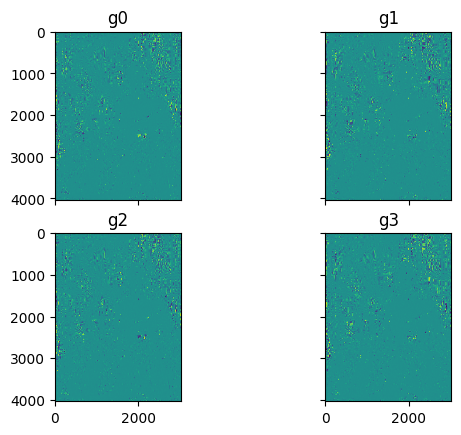

In [ ]:
g0 = A / 2 * np.cos(fase_img)
g1 = - A / 2 * np.sin(fase_img)
g2 = - A / 2 * np.cos(fase_img)
g3 = A / 2 * np.sin(fase_img)

# 4 subplots sharing both x/y axes

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
axs[0, 0].imshow(g0)
axs[0, 0].set_title('g0')
axs[0, 1].imshow(g1)
axs[0, 1].set_title('g1')
axs[1, 0].imshow(g2)
axs[1, 0].set_title('g2')
axs[1, 1].imshow(g3)
axs[1, 1].set_title('g3')


In [ ]:
fases = np.arctan2(g3 - g1, g0 - g2)
print(np.min(fases), np.max(fases))

-3.141592653589793 3.141592653589793


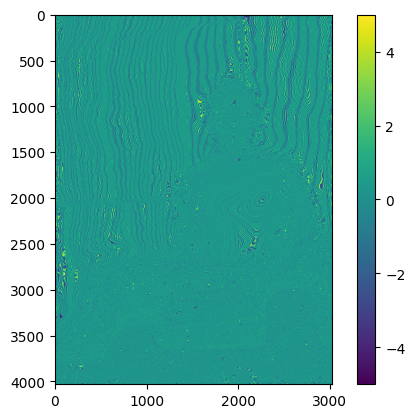

In [ ]:
depth = (c/2) * ( fases / (2 * np.pi * 3e8/(10*2) ) )

plt.imshow(depth)
plt.colorbar()

-5.0 5.0
2 65537


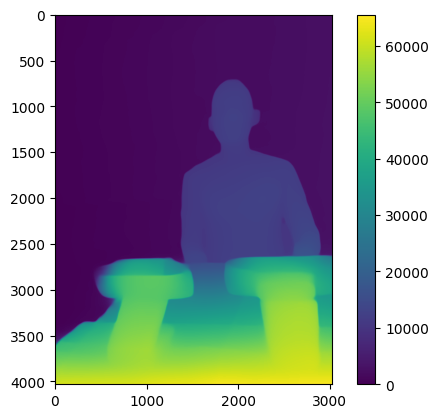

In [ ]:
plt.imshow(depth_img - depth)
plt.colorbar()

print(np.min(depth), np.max(depth))
print(np.min(depth_img), np.max(depth_img))

# **Direct Time of Flight**